# Project: Medical Appointment No Shows 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set I have selected is **Medical Appointment No Shows** . The reason why I have selected this dataset is becuase as I am working for a healtcare firm, I would like to understand patient behaviour or characteritics behind on why does a patient show up or do not show up for appointment.

> The dataset variables are self explanatory and the orginal variables that exist here are 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'



> **The Business questions I am trying to answer are:**
    
    1. Is there any Gender difference in having a patient to be with status Show / No-Show? 
    
      (Có bất kỳ sự khác biệt nào về Giới tính khi bệnh nhân ở trạng thái Có mặt/Không có mặt không?)
    
    2. Is there any Age difference in having a patient to be with status Show / No- Show?
    
    (Có bất kỳ sự khác biệt nào về Tuổi tác trong việc đưa bệnh nhân vào tình trạng Hiển thị / Không Hiển thị không?)
    
    3. Is there any Age difference along with Gender difference with the status of Show / NoShow?
    
    (Có bất kỳ sự khác biệt nào về Độ tuổi cùng với sự khác biệt về Giới tính với tình trạng Show/NoShow không?)
    
    4. On which weekday/day/month maximum appointments are getting finalized with Show status?
    
    (Vào ngày nào trong tuần/ngày/tháng, các cuộc hẹn tối đa sẽ được hoàn tất với trạng thái Hiển thị?)
    
    5. Is there any specific medical condition that is driving the patient(Male/Female) to go to for the doctor appointment?
    
    (Có tình trạng y tế cụ thể nào khiến bệnh nhân (Nam/Nữ) phải đi khám bác sĩ không?)
    
    6. Are the digital /social media reminders are helping the patients to take doctor's appointment?
    
    (Các lời nhắc trên phương tiện truyền thông xã hội/kỹ thuật số có đang giúp bệnh nhân đến cuộc hẹn với bác sĩ không?)
    
    7. Is Scholarship from the government helping patients for good turnaround for physician visits?
    
    (Học bổng từ chính phủ có giúp bệnh nhân quay vòng tốt khi đi khám bác sĩ không?)
    
    8. Which neighbourhood regions are actually have higher appointments with physicians?
    
    (Những khu vực lân cận nào thực sự có nhiều cuộc hẹn với bác sĩ hơn?)
    
    

**Below are the steps involved to understand, clean and prepare our data for data exploration or building a predictive model step by step:**

1. Variable Identification -> 2. Univariate Analysis -> 3. Bi-variate Analysis -> 4. Missing values treatment -> 5. Outlier treatment -> 6. Variable transformation ->7. Variable creation


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette("pastel")
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import pandas as pd
import numpy as np                                                   # for linear algebra
import datetime                                                      # to deal with date and time
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


<a id='wrangling'></a>
## Data Wrangling ( Sắp xếp dữ liệu)


#### Loading the data 

In [2]:
df = pd.read_csv('../Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
# Create the summary report ( Find any anomalies in the data)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Min age is showing value less than zero (Probably an exception) and max value of age is greater than 100. 
It is impossible compared to real human age.

### Variable Identification (Nhận dạng biến)

First we will identify the predictor and target variable

In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

No-show is a target variable and all other variables are predictors

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Type of variable

**Predictor variables**


1. Gender             
2. ScheduledDay       
3. AppointmentDay     
4. Age                
5. Neighbourhood      
6. Scholarship        
7. Hipertension       
8. Diabetes           
9. Alcoholism         
10. Handcap           
11. SMS_received      


**Target variable**

1. No-show            



### Data Type

#### Character

Gender ,
ScheduledDay, 
AppointmentDay ,
Neighbourhood,
No-show

#### Numeric

PatientId, AppointmentID,  Age,  Scholarship, Hipertension,
       Diabetes, Alcoholism, Handcap, SMS_received

### Variable Category

#### Categorical

        'Gender', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'



In [6]:
#Check missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in the above dataset

In [7]:
#structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for some sample counts

In [8]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [9]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [10]:
#Check for scheduled day and appointment day  
df[['ScheduledDay','AppointmentDay']].head(10)

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z
5,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z
6,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z
7,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z
8,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z
9,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z


In [11]:
# # Convert that dateformat which is in string to datetime64[ns]
# The day of the week with Monday=0, Sunday=6

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

In [12]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4


In [13]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [14]:
df['Month_appointed'].nunique()

3

In [15]:
#Rename the columns which have incorrect spelling mistakes - this will helps us create columns in easy to understand way
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap':'Handicap', 'No-show' : 'NoShow'}, inplace = True)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4,29,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4,29,4,4
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,27,2,4,29,4,4
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,27,2,4,29,4,4
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,27,2,4,29,4,4
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,29,4,4,29,4,4
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,27,2,4,29,4,4


In [16]:
columns_specified = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow']

In [17]:
# find the unique values for each of the columns specified
for item in columns_specified:
    print("the unique values for {} are {}".format(item ,df[item].unique()))

the unique values for Gender are ['F' 'M']
the unique values for Age are [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
the unique values for Neighbourhood are ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO

Age has values with -1 (Which is unrealistic) and > 100 (There might be few patients with > 100 , but we can consider these patients as outliers)

In [18]:
# Check how many records with age < 0 age > 100
df.query('Age < 0  | Age > 100').count()

PatientId            8
AppointmentID        8
Gender               8
ScheduledDay         8
AppointmentDay       8
Age                  8
Neighbourhood        8
Scholarship          8
Hypertension         8
Diabetes             8
Alcoholism           8
Handicap             8
SMS_received         8
NoShow               8
Day_Scheduled        8
weekday_Scheduled    8
Month_Scheduled      8
Day_appointed        8
weekday_appointed    8
Month_appointed      8
dtype: int64

8 Records have Age < 0 and Age > 100.
Hence consider these patients as outliers and remove them 

In [19]:
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PatientId          110519 non-null  float64       
 1   AppointmentID      110519 non-null  int64         
 2   Gender             110519 non-null  object        
 3   ScheduledDay       110519 non-null  datetime64[ns]
 4   AppointmentDay     110519 non-null  datetime64[ns]
 5   Age                110519 non-null  int64         
 6   Neighbourhood      110519 non-null  object        
 7   Scholarship        110519 non-null  int64         
 8   Hypertension       110519 non-null  int64         
 9   Diabetes           110519 non-null  int64         
 10  Alcoholism         110519 non-null  int64         
 11  Handicap           110519 non-null  int64         
 12  SMS_received       110519 non-null  int64         
 13  NoShow             110519 non-null  object  

In [21]:
#Unique patient counts in the dataset
df.PatientId.nunique()

62294

### Univariate Analysis

We will first look at the target variable, i.e., NoShow. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot. 
Frequency table of a variable will give us the count of each category in that variable.

In [22]:
df['NoShow'].value_counts()

No     88203
Yes    22316
Name: NoShow, dtype: int64

In [23]:
# Normalise can be set to true to print the proportions instead of Numbers.
df['NoShow'].value_counts(normalize=True)

No     0.79808
Yes    0.20192
Name: NoShow, dtype: float64

Here there is no class imbalance problem . Hence we can proceed further without addressing any class imbalance issues

Text(0, 0.5, 'Count patient')

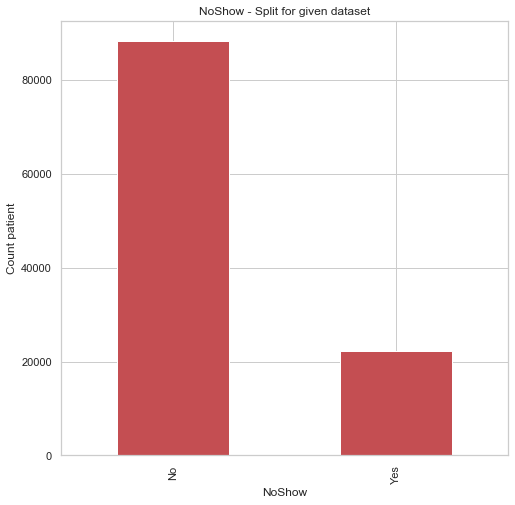

In [24]:
df['NoShow'].value_counts().plot.bar(figsize = (8,8), title = 'NoShow - Split for given dataset', color = 'r')
plt.xlabel('NoShow')
plt.ylabel('Count patient')

Total patient : 110,480.
The patient records or instances who DO NOT show up on scheduled time: 22,312 patient ~ 20%
The patient records or instances who DO NOT show up on scheduled time: 88,168 patient ~ 80%

Now we visualize each variable separately. Different types of variables are Categorical and numerical.

+ Numerical features: Age, Day_Scheduled, Day_appointed

+ Categorical features: 'Gender', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'

#### Let’s visualize the categorical and ordinal features first.

<Figure size 432x288 with 0 Axes>

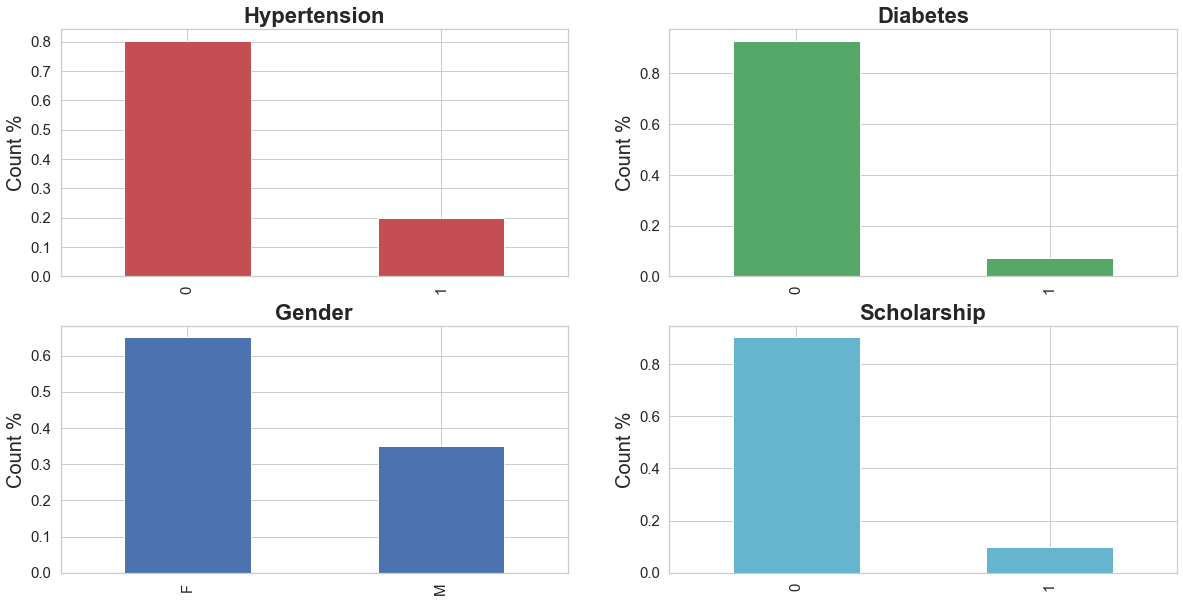

In [25]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Hypertension', 'Diabetes', 'Gender', 'Scholarship']
colour = ['r', 'g', 'b', 'c']
i = 0
for col in iter_cols:    
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(20,10), fontsize = 15.0, color = colour[i])
    plt.title(col, fontweight="bold", fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    i = i +1   


It can be inferred from the above bar plots that:

* ~65% patient instances are with female records 
* Around 85% of the these instances are not having scholarship.
* ~20% of patient instances have Hypertension.
* ~88% of patient instacnes do not have diabetes 


<Figure size 432x288 with 0 Axes>

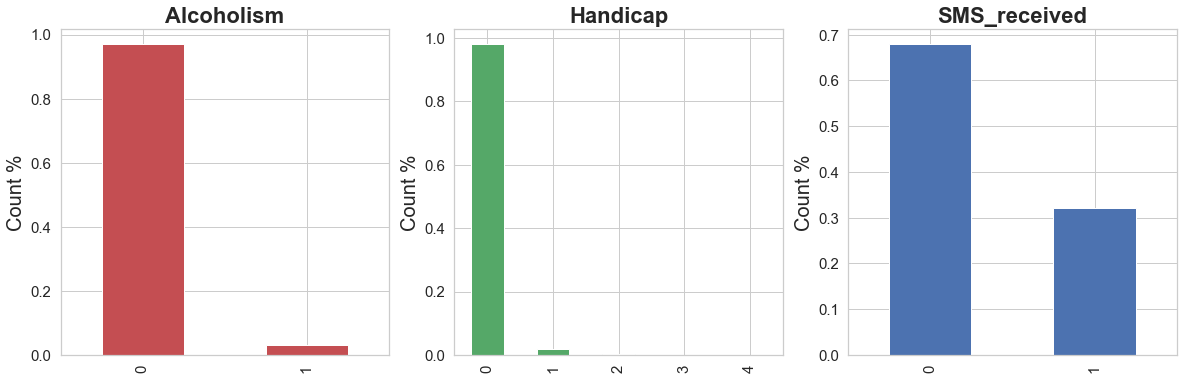

In [26]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Alcoholism', 'Handicap', 'SMS_received']

colour = ['r', 'g', 'b']
i = 0
for col in iter_cols:    
    plt.subplot(int(str(13)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(20,6), fontsize = 15.0, color = colour[i])
    plt.title(col, fontweight="bold", fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    i = i +1   


It can be inferred from the above bar plots that:

* ~98% patient instances are alcoholics.
* ~99% of the patient instances are with Handicap status = 0
* ~70% of the patient instances have received SMS regarding the appointment /scheduled time



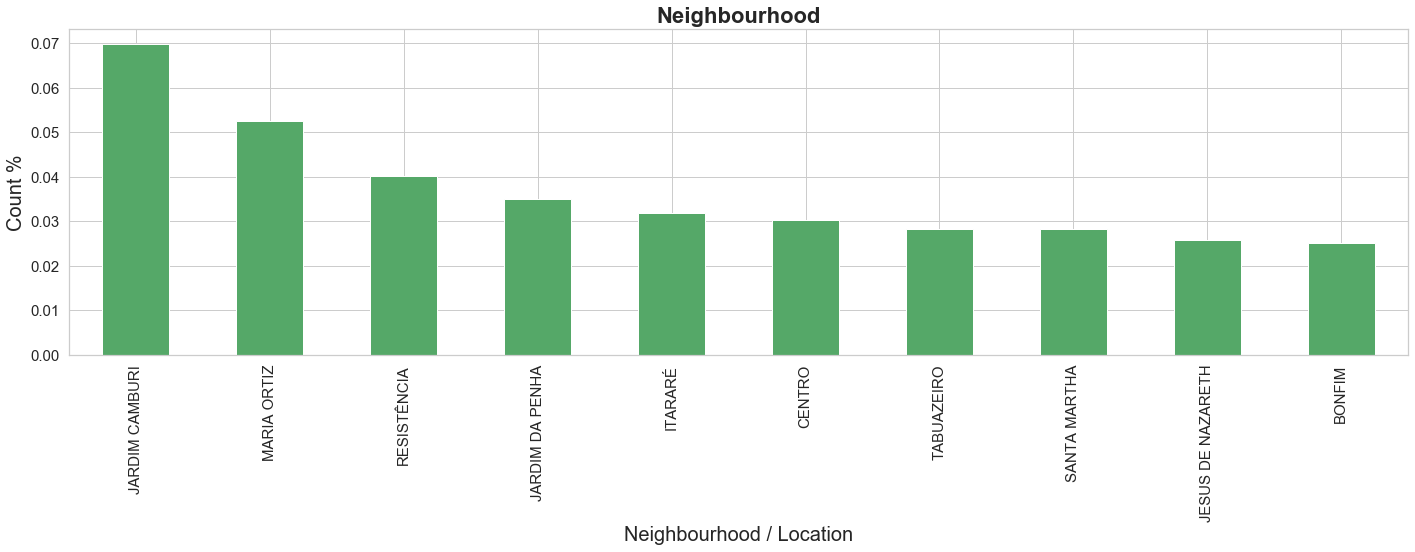

In [27]:
# Plot the neighbourhood values
df['Neighbourhood'].value_counts(normalize=True).sort_values(ascending = False)[:10].plot.bar(figsize=(24,6), fontsize = 15.0, color = 'g')
plt.title('Neighbourhood', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.xlabel('Neighbourhood / Location', fontsize = 20.0)
plt.show()

JARDIM CAMBURI location has majority of the patient instances , followed by MARIA ORTIZ

#### Let's visualize the Numerical Attributes

(Age, Day_Scheduled and Day_appointed) 



/Users/hieu/.conda/envs/data_analyst/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



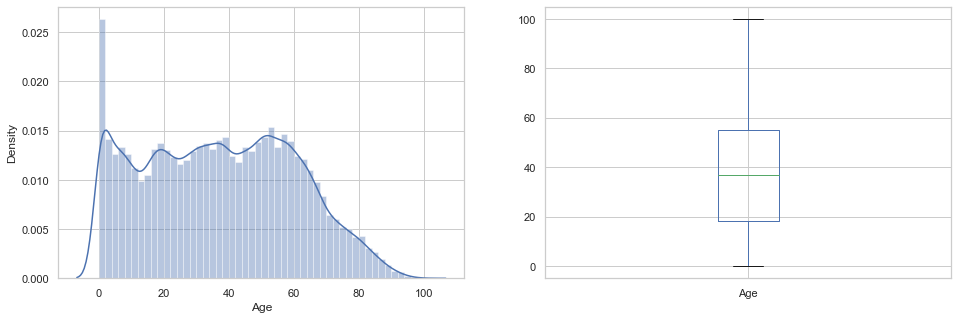

In [28]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Age'])

plt.subplot(122)
df['Age'].plot.box(figsize=(16,5))

plt.show()

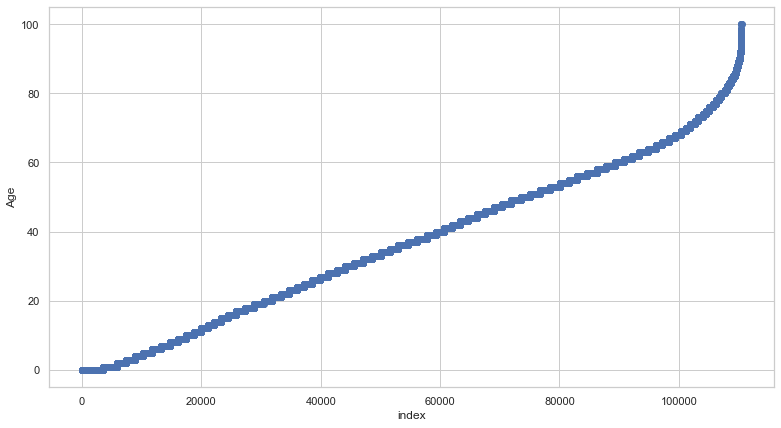

In [29]:
plt.figure(figsize=(13,7))
plt.scatter(range(df.shape[0]), np.sort(df.Age.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

cnt_srs = df['Age'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Viridis',
        showscale=True
    ),
)
layout = go.Layout(
    title='Age distribution'    
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

* From the above age graph there are no outliers 

/Users/hieu/.conda/envs/data_analyst/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



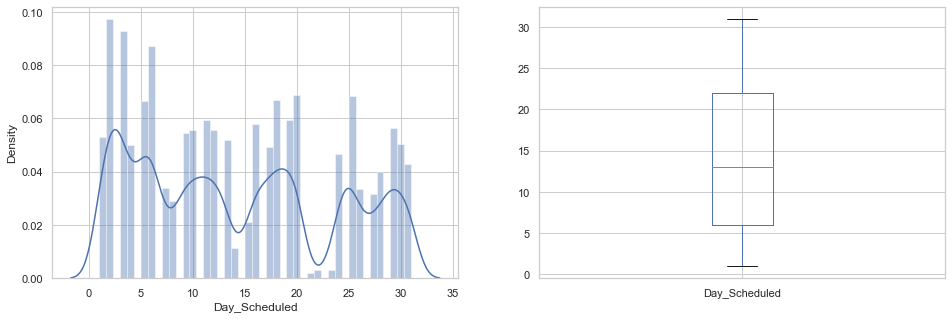

In [30]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Day_Scheduled'])


plt.subplot(122)
df['Day_Scheduled'].plot.box(figsize=(16,5))

plt.show()

/Users/hieu/.conda/envs/data_analyst/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



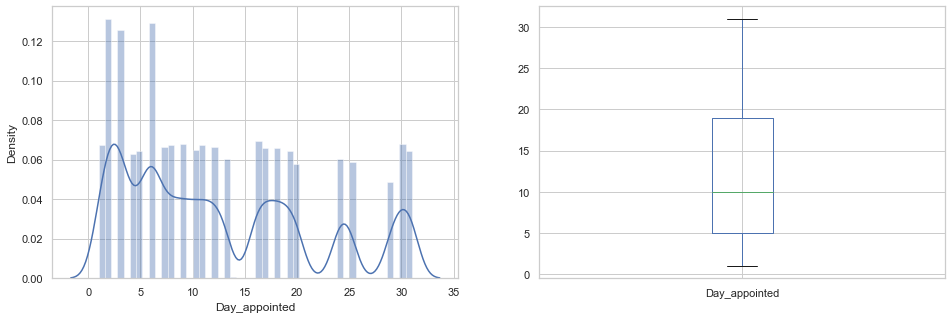

In [31]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Day_appointed'])


plt.subplot(122)
df['Day_appointed'].plot.box(figsize=(16,5))

plt.show()

### Bi-variate Analysis

#### Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. 
Let us look at the stacked bar plot now which will give us the proportion of instances who are with NoShow split

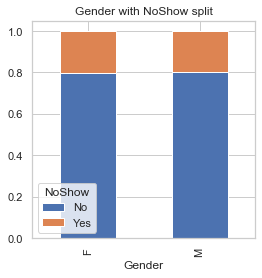

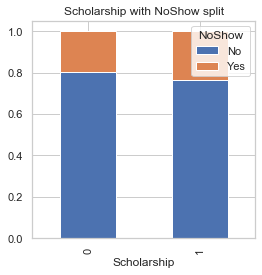

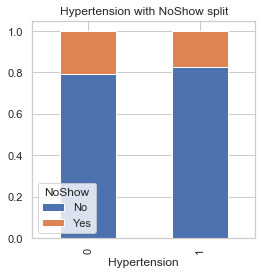

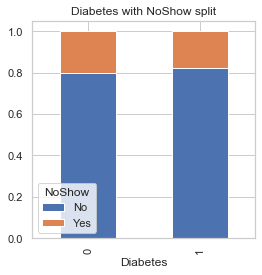

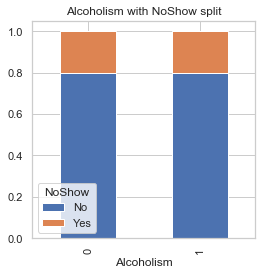

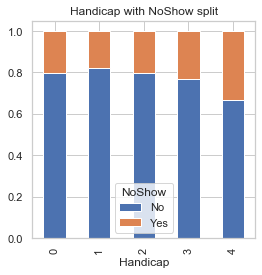

In [32]:
cat_list = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
for col in cat_list:
    col1 =pd.crosstab(df[col],df['NoShow'])
    col1.div(col1.sum(1).astype(float), axis=0).plot(kind="bar",  stacked=True, figsize=(4,4), title = col + ' with NoShow split'); 
    

The inferences that can be made from here are:
* Not much of difference in Female/Male groups with "NoShow" status
* Instances who have scholarship have slightly more "NoShow" status
* Hypertension & Diabetes instances have more "NoShow" status
* Not much of difference in Alcoholism/Non-Alcoholism groups with "NoShow" status
* Handicap with category 4 have more "NoShow" status



#### Bi-variate Analysis on Numeric variables vs Target variable

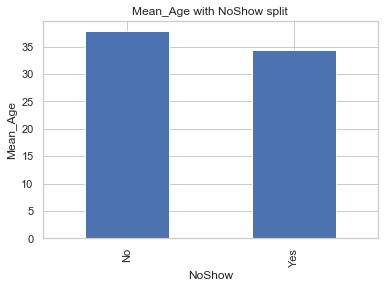

In [33]:
df.groupby('NoShow')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');
plt.title('Mean_Age with NoShow split');

* The mean age group of instances with "NoShow" have lesser age 

### Missing values treatment & Outlier treatment

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PatientId          110519 non-null  float64       
 1   AppointmentID      110519 non-null  int64         
 2   Gender             110519 non-null  object        
 3   ScheduledDay       110519 non-null  datetime64[ns]
 4   AppointmentDay     110519 non-null  datetime64[ns]
 5   Age                110519 non-null  int64         
 6   Neighbourhood      110519 non-null  object        
 7   Scholarship        110519 non-null  int64         
 8   Hypertension       110519 non-null  int64         
 9   Diabetes           110519 non-null  int64         
 10  Alcoholism         110519 non-null  int64         
 11  Handicap           110519 non-null  int64         
 12  SMS_received       110519 non-null  int64         
 13  NoShow             110519 non-null  object  

In [35]:
df.isnull().sum()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
Day_Scheduled        0
weekday_Scheduled    0
Month_Scheduled      0
Day_appointed        0
weekday_appointed    0
Month_appointed      0
dtype: int64

* There are no missing values and it seems there are no outliers from the univariate analysis done earlier (There were some patients with Age < 0 and Age > 100 , I have removed them from the data )

### Feature Engineering

Feature engineering is the science (and art) of extracting more information from existing data. 
You are not adding any new data here, but you are actually making the data you already have more useful.

Feature engineering itself can be divided in 2 steps:

* Variable transformation.
* Variable / Feature creation.

#### Variable Transformation

In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation.
In other words, transformation is a process that changes the distribution or relationship of a variable with others.

Here in this case study , I do not see any transformations are required for the variables listed for this dataset

#### Variable creation

Yes the AppointmentTime and ScheduledTime  are converted into day of month with names Day_Scheduled and Day_appointed

* Let us drop unnecessary columns

In [36]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

##### the columns below are unnecessary because they don't add any prediction value, hence we can drop them
'PatientId', 'AppointmentID', 'ScheduledDay',  'AppointmentDay'

In [37]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [38]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [39]:
df['weekday_appointed'].unique()

array([4, 1, 0, 2, 3, 5])

/Users/hieu/.conda/envs/data_analyst/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



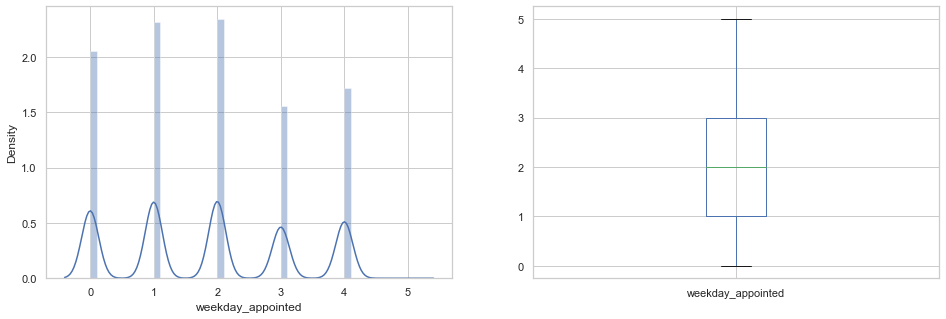

In [40]:
# The day of the week with Monday=0, Sunday=6
plt.figure(1)
plt.subplot(121)
sns.distplot(df['weekday_appointed'])


plt.subplot(122)
df['weekday_appointed'].plot.box(figsize=(16,5))

plt.show()

Tuesday and Wednesday have maximum number of appointments

/Users/hieu/.conda/envs/data_analyst/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



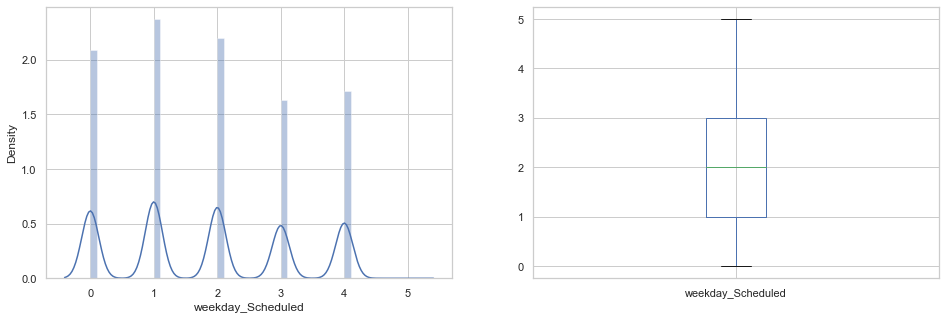

In [41]:
# The day of the week with Monday=0, Sunday=6
plt.figure(1)
plt.subplot(121)
sns.distplot(df['weekday_Scheduled'])


plt.subplot(122)
df['weekday_Scheduled'].plot.box(figsize=(16,5))

plt.show()

* Now the data set is almost cleaned with all the pre-processing steps. Now we can do an Exploratory Data Analysis


<a id='eda'></a>
## Exploratory Data Analysis

> Now I will be answering all the questions mentioned above with my analysis

### 1. Is there any Gender difference in having a patient to be with status Show / No-Show? 

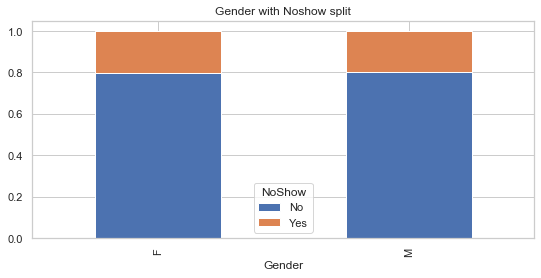

In [42]:
fig, ax = plt.subplots()
Gender=pd.crosstab(df['Gender'],df['NoShow'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax, title = 'Gender with Noshow split');
ax.set_facecolor('white')

* There is not much of difference with gender in having the status with Show/NoShow

### 2. Is there any Age difference in having a patient to be with status Show / No- Show?

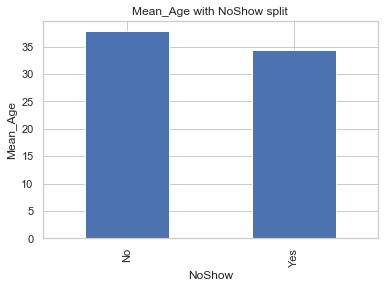

In [43]:
fig, ax = plt.subplots()
df.groupby('NoShow')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');
plt.title('Mean_Age with NoShow split');

* The mean age group of instances with "NoShow = Yes" have lesser age

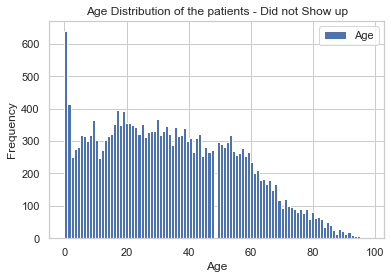

In [44]:
# Age Distribution
# Get the distribution for only NoShow = 1 / Yes
df_NoShow = df[df['NoShow']  == "Yes"]
df_NoShow.plot(kind = "hist",y = "Age",bins = 100, color = 'b') 
plt.title('Age Distribution of the patients - Did not Show up')
plt.xlabel('Age');

* Of those patients who have showed up for appointment, majority patients with age group from 20 to 40 did not show up for the   appointment when compared to age groups 0-20, 40-60 and 60 plus

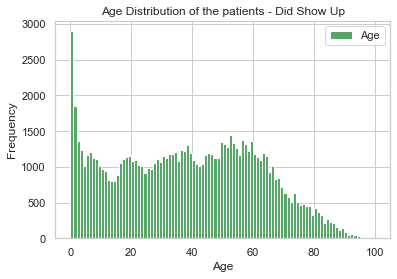

In [45]:
df_Show = df[df['NoShow'] == "No"]
df_Show.plot(kind = "hist",y = "Age",bins = 100, color = 'g') 
plt.title('Age Distribution of the patients - Did Show Up')
plt.xlabel('Age')
plt.show()

* Of the patients who have showed up for appointment,
  it seems that age group from 40 to 60 have really showed interest in appointment when compared to age groups of 0-20, 20-40 and 60 plus.  

### 3. Is there any Age difference along with Gender difference with the status of Show / NoShow?

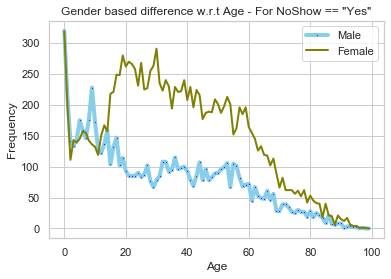

In [46]:
# Analysing the distribution among genders with their age whose status for NoShow is "Yes"
# i.e, they are NOT coming for the appointment.
range_df = pd.DataFrame()
range_df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df.NoShow == 'Yes')]))
Female = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df.NoShow == 'Yes')]))

# multiple line plot
plt.plot( range_df, Male, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( range_df, Female, marker='', color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference w.r.t Age - For NoShow == "Yes"');

* Female patients with Age group from 20 to 40 are NOT active in getting appointment
  with doctors when compared to similar age group of Males

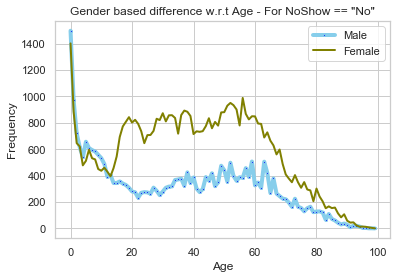

In [47]:
# Analysing the distribution among genders with their age whose status for NoShow is "No"
# i.e, they are NOT coming for the appointment.
range_df = pd.DataFrame()
range_df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df.NoShow == 'No')]))
Female = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df.NoShow == 'No')]))

# multiple line plot
plt.plot( range_df, Male, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( range_df, Female, marker='', color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference w.r.t Age - For NoShow == "No"');

* Female patients with Age group from 40 to 60 are active in getting appointment
  with doctors when compared to similar age group of Males

###  4. On which weekday/day/month maximum appointments are getting finalized with Show status?

In [48]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [49]:
def create_plots(x_vector, _hue, _data, _xlable, _ylabel, _title):
    app_weekday = sns.countplot(x = x_vector, hue = _hue, data = _data)
    app_weekday.set_title(_title)
    plt.xlabel(_xlable)
    plt.ylabel(_ylabel)
    plt.show()

In [50]:
_hue = 'NoShow'
_ylabel = 'Appointment Frequency'
_data = df

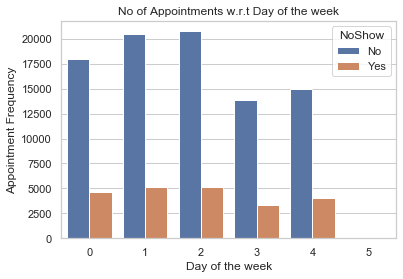

In [51]:
_xlable = 'Day of the week'
_title = 'No of Appointments w.r.t Day of the week'
x_vector = 'weekday_appointed'
create_plots(x_vector, _hue, _data, _xlable, _ylabel, _title)
#The day of the week with Monday=0, Sunday=6

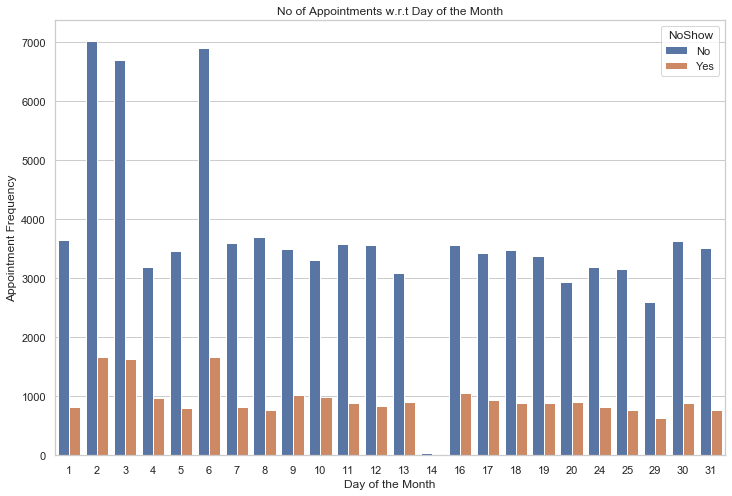

In [52]:
_xlable = 'Day of the Month'
_title = 'No of Appointments w.r.t Day of the Month'
x_vector = 'Day_appointed'
plt.figure(figsize = (12,8))
create_plots(x_vector, _hue, _data, _xlable, _ylabel, _title)

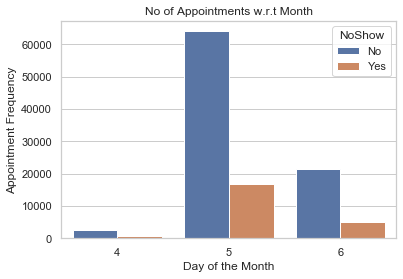

In [53]:
_xlable = 'Day of the Month'
_title = 'No of Appointments w.r.t Month'
x_vector = 'Month_appointed'
create_plots(x_vector, _hue, _data, _xlable, _ylabel, _title)

* Majority of the visits or appointments happend on the weeekdays
  (Monday, Tuesday and Wednesday) when compared to weekends


* Majority of the appointments happend in the month of May

### 5. Is there any specific medical condition that is driving the patient(Male/Female) to go  for the doctor appointment? 

<Figure size 432x288 with 0 Axes>

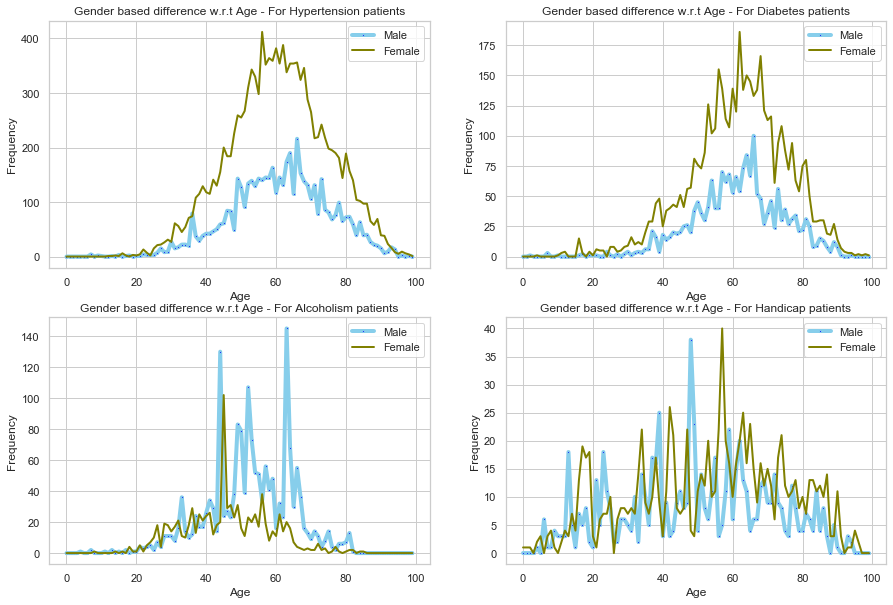

In [54]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
for col in iter_cols: 
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    range_df = pd.DataFrame()
    range_df['Age'] = range(100) # Setting up for the age limit of 100 only
    Male_Hyper = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df[col] == 1) & (df.NoShow == 'No') ]))
    Female_Hyper = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df[col] == 1)& (df.NoShow == 'No')]))

    # multiple line plot
    plt.plot( range_df, Male_Hyper, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
    plt.plot( range_df, Female_Hyper, marker='', color='olive', linewidth=2)

    plt.legend(['Male','Female'])
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    # plt.figsize=(20,10)
    plt.title('Gender based difference w.r.t Age - For {} patients'.format(col));

    

#### Inferences from the above charts are:

*  Hypertension and Diabetes patients are attending the doctor with NoShow status  = "No" are from the similar age ranges from 40 to 80 - with females conversion better than Males

*  Alcoholism patients from Male group visits are more compared to female and they are in range from 45 to 65.

*  Male and Female visits for Handicap patient are in the similar range (There is not much of difference)
    

### 6. Are the digital /social media reminders are helping the patients to take doctor's appointment?

#### SMS_received

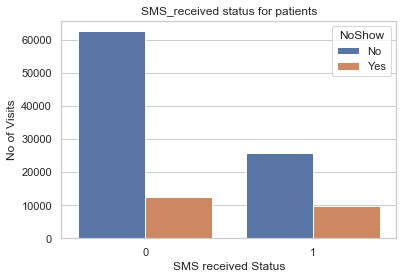

In [55]:
SMS_recieved = sns.countplot(x = 'SMS_received', hue = 'NoShow', data = df)
SMS_recieved.set_title('SMS_received status for patients')
plt.xlabel('SMS received Status')
plt.ylabel('No of Visits')
plt.show()

*  It can be inferred that patients (~25K visits) who have recieved SMS have turned up for physician visit 

### 7. Is Scholarship from the government helping patients for good turnaround for physician visits?

#### Scholarship

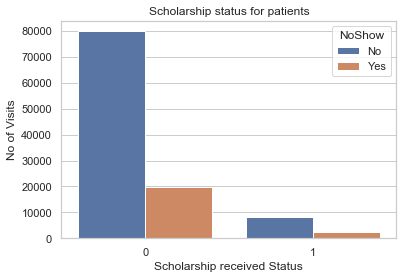

In [56]:
Scholarship = sns.countplot(x = 'Scholarship', hue = 'NoShow', data = df)
Scholarship.set_title('Scholarship status for patients')
plt.xlabel('Scholarship received Status')
plt.ylabel('No of Visits')
plt.show()

* We would expect that patients who have got scholarship  should have been all attended the physician but it seems that ~25% of patients did not attend

### 8. Which neighbourhood regions are actually have higher appointments with physicians?

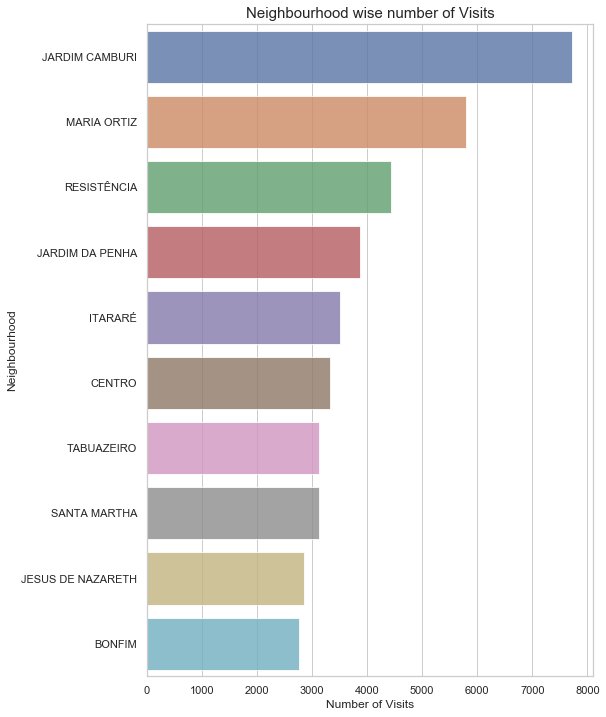

In [57]:
# Top 10 Neighbourhood values based on the Visits
cnt_srs = df['Neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood wise number of Visits", fontsize=15)
plt.show()

In [58]:
# temp_series = df['Neighbourhood'].value_counts().head(20)

# labels = (np.array(temp_series.index))
# sizes = (np.array((temp_series / temp_series.sum())*100))

# trace = go.Pie(labels=labels, values=sizes)
# layout = go.Layout(
#     title='Neighbourhood - No of Visits'
# )
# data = [trace]
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename="Neighbourhood")

In [62]:
no_show = df.query("NoShow == 'Yes'")
show = df.query("NoShow == 'No'")

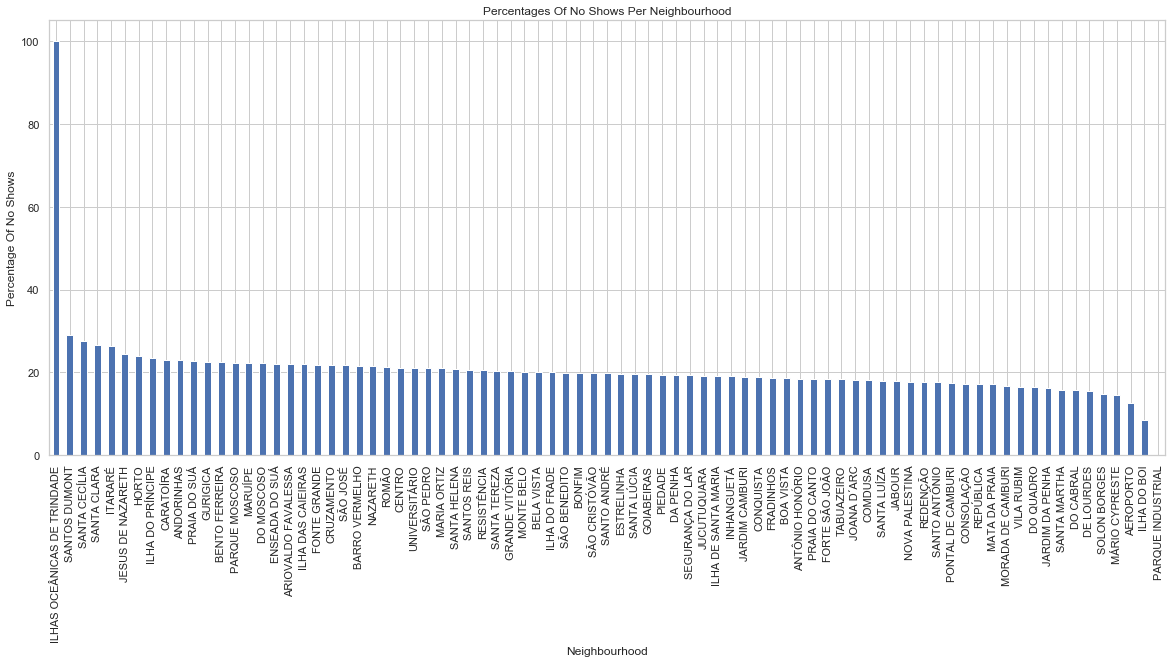

In [63]:
# Investigating neighbourhoods exlusively in regards to show or no shows
hoods_no_show = no_show.groupby(['Neighbourhood']).count()['NoShow']
hoods = df.groupby(['Neighbourhood']).count()['NoShow']
hoods_show = show.groupby(['Neighbourhood']).count()['NoShow']

percentages_no_show = hoods_no_show/hoods*100
percentages_no_show.sort_values()

# Plotting percentages of no_shows per neighbourhood
percentages_no_show.sort_values(ascending=False).plot(kind='bar', title='Percentages of No shows per Neighbourhood'.title(), figsize=(20,8));
plt.ylabel('Percentage of no_shows'.title().replace("_"," "))
plt.xlabel('neighbourhood'.title());

* The most percentage of no show - ILHAS OCEÂNICAS DE TRINDADE 100% (100% no show)
* The least percentage of no show - PARQUE INDUSTRIAL 0% (100% show)

<a id='conclusions'></a>
## Conclusions

* 1. Of those patients who have showed up for appointment, majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus. of these 20 to 40 age group, Female patients are NOT active in getting appointment with doctors when compared to similar age group of Males

* 2. Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends. Hence weekdays are the best for good conversion for appointment

* 3. Hypertension and Diabetes patients are attending the doctor when compared to other medications. Age ranges from 40 to 80 - with females conversion is better than Males. 

* 4. Alcoholism patients from Male group have showed up for physician visit when  compared to female and they are in range from 45 to 65. 

* 5. If there are any promotions towards digital media either through SMS / emails, the conversion  for physician visit will improve and from the data it is inferred that patients (~25K visits) who have recieved SMS have turned up for physician visit.

* 6. On contrary actually we would expect that patients who have got scholarship  should have been all attended the physician but it seems that ~25% of patients did not attend.

* 7. A high percentage of visits take place from PARQUE INDUSTRIAL (100% show - 0% noshow), but we're not sure why this is happening. There can be many reasons such as the majority of patients may be from that place or the majority of doctors are from that location.

* 8. A low percentage of hits comes from ILHAS OCEânICAS DE TRINDADE (0% impressions - 100% absences), but we're not sure why this is happening. There can be many reasons such as very few patients can come from that place or the majority of doctors come from that location. Or no patients from here.
